# Basic Reprojection Demo
In this notebook we go through a basic example showing how the reprojection can be run

In [10]:
from astropy.io import fits

from reprojection.reproject import calculate_reprojection
from create_test_data import create_test_fits_mini, create_test_fits_tiny, create_test_fits
from reprojection.utils import plot_wcs_comparison, compare_images


We use our `create_test_fits` function that creates some fake data with minorly different WCS

In [11]:
source_file, target_file = create_test_fits()
source_hdu = fits.open(source_file)[0]
target_hdu = fits.open(target_file)[0]

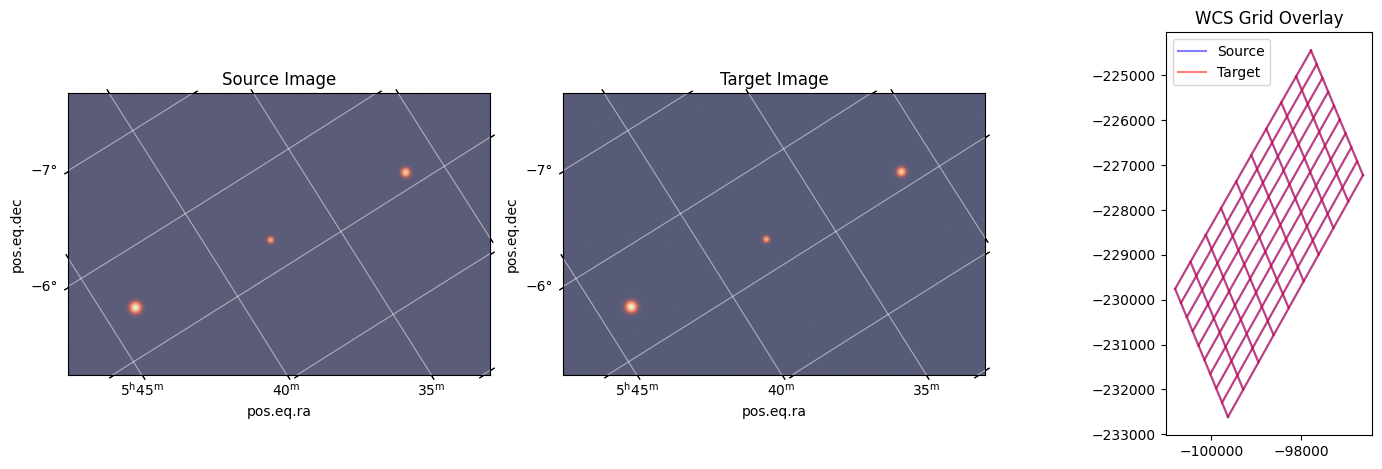

In [12]:
plot_wcs_comparison(source_hdu, target_hdu)

Now we can clearly visualize the image misalignment. Let's go ahead and run our reprojection code.

In [13]:
reprojected_source = calculate_reprojection(source_hdu, target_hdu)

/home/carterrhea/Documents/reprojection/src/reprojection/reproject.py:360: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dec_0_rad = torch.deg2rad(torch.tensor(self.target_wcs.DEC_0, dtype=x_scaled.dtype))
/home/carterrhea/Documents/reprojection/src/reprojection/reproject.py:361: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ra_0_rad = torch.deg2rad(torch.tensor(self.target_wcs.RA_0, dtype=x_scaled.dtype))
/home/carterrhea/Documents/reprojection/src/reprojection/reproject.py:398: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ra_0_rad = to

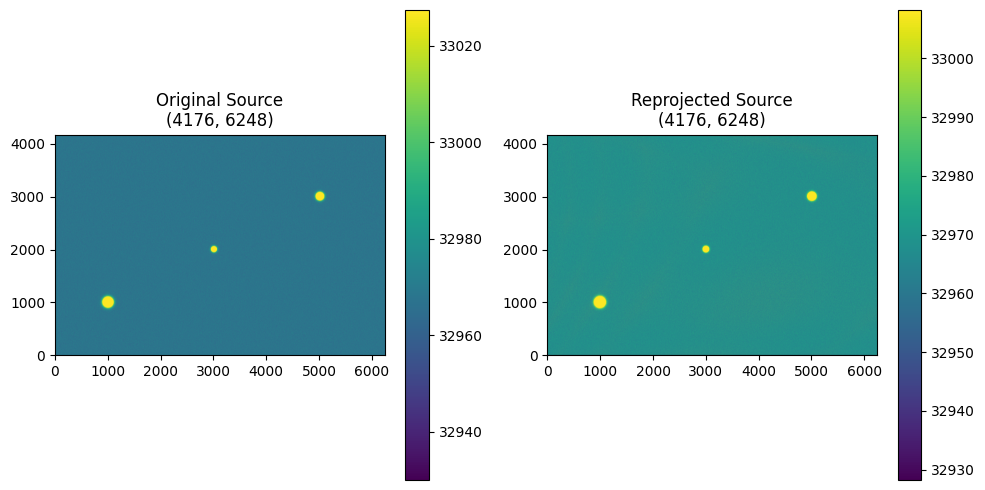

In [14]:
fig = compare_images(source_hdu, reprojected_source)